In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datasets import load_from_disk
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

2022-10-15 19:49:01.690452: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-15 19:49:01.858681: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-10-15 19:49:01.900466: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-15 19:49:02.657628: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

### Read the dataset

In [2]:
violence_hidden = load_from_disk("../../Violence_data/geo_corpus.0.0.1_datasets_hidden_small_labse")

In [3]:
violence_hidden

DatasetDict({
    train: Dataset({
        features: ['tweetid', 'retweetid', 'date', 'timestamp', 'username', 'geo_x', 'geo_y', 'lang', 'text', 'key', 'post1geo10', 'post1geo20', 'post1geo30', 'post1geo50', 'post1geo70', 'post2geo10', 'post2geo20', 'post2geo30', 'post2geo50', 'post2geo70', 'post3geo10', 'post3geo20', 'post3geo30', 'post3geo50', 'post3geo70', 'post7geo10', 'post7geo20', 'post7geo30', 'post7geo50', 'post7geo70', 'pre1geo10', 'pre1geo20', 'pre1geo30', 'pre1geo50', 'pre1geo70', 'pre2geo10', 'pre2geo20', 'pre2geo30', 'pre2geo50', 'pre2geo70', 'pre3geo10', 'pre3geo20', 'pre3geo30', 'pre3geo50', 'pre3geo70', 'pre7geo10', 'pre7geo20', 'pre7geo30', 'pre7geo50', 'pre7geo70', 'input_ids', 'token_type_ids', 'attention_mask', 'hidden_state'],
        num_rows: 16769932
    })
    validation: Dataset({
        features: ['tweetid', 'retweetid', 'date', 'timestamp', 'username', 'geo_x', 'geo_y', 'lang', 'text', 'key', 'post1geo10', 'post1geo20', 'post1geo30', 'post1geo50', 'post1geo

In [4]:
# pick a subset of the training set (1M observations)
train_ds = violence_hidden["train"].shuffle(seed=42).select(range(1000000))

Loading cached shuffled indices for dataset at ../../Violence_data/geo_corpus.0.0.1_datasets_hidden_small_labse/train/cache-34f1af89f0326848.arrow


In [5]:
train_ds

Dataset({
    features: ['tweetid', 'retweetid', 'date', 'timestamp', 'username', 'geo_x', 'geo_y', 'lang', 'text', 'key', 'post1geo10', 'post1geo20', 'post1geo30', 'post1geo50', 'post1geo70', 'post2geo10', 'post2geo20', 'post2geo30', 'post2geo50', 'post2geo70', 'post3geo10', 'post3geo20', 'post3geo30', 'post3geo50', 'post3geo70', 'post7geo10', 'post7geo20', 'post7geo30', 'post7geo50', 'post7geo70', 'pre1geo10', 'pre1geo20', 'pre1geo30', 'pre1geo50', 'pre1geo70', 'pre2geo10', 'pre2geo20', 'pre2geo30', 'pre2geo50', 'pre2geo70', 'pre3geo10', 'pre3geo20', 'pre3geo30', 'pre3geo50', 'pre3geo70', 'pre7geo10', 'pre7geo20', 'pre7geo30', 'pre7geo50', 'pre7geo70', 'input_ids', 'token_type_ids', 'attention_mask', 'hidden_state'],
    num_rows: 1000000
})

### Creating a feature matrix

In [6]:
# This code took almost 20 min to run
%time X_train = np.array(train_ds["hidden_state"])

y_train_pre7_10 = np.array(train_ds["pre7geo10"])
y_train_pre7_30 = np.array(train_ds["pre7geo30"])
y_train_pre7_50 = np.array(train_ds["pre7geo50"])
y_train_post7_10 = np.array(train_ds["post7geo10"])
y_train_post7_30 = np.array(train_ds["post7geo30"])
y_train_post7_50 = np.array(train_ds["post7geo50"])

X_train.shape

CPU times: user 6min 43s, sys: 45.5 s, total: 7min 29s
Wall time: 7min 27s


(1000000, 768)

### Visualize the training set

In [7]:
# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
%time mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)


CPU times: user 4d 9h 35min 48s, sys: 24min 58s, total: 4d 10h 47s
Wall time: 3h 5min 13s


NameError: name 'y_train_pre_10' is not defined

In [8]:
# Create a dataframe of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb['pre7geo10'] = y_train_pre7_10
df_emb['pre7geo30'] = y_train_pre7_30
df_emb['pre7geo50'] = y_train_pre7_50
df_emb['post7geo10'] = y_train_post7_10
df_emb['post7geo30'] = y_train_post7_30
df_emb['post7geo50'] = y_train_post7_50
df_emb.head()

,X,Y,pre7geo10,pre7geo30,pre7geo50,post7geo10,post7geo30,post7geo50
0,5.690950,-0.038486,0,0,1,0,0,0
1,7.338534,1.879822,1,1,1,1,1,1
2,3.875493,6.382792,0,0,0,1,1,1
3,3.589398,1.612494,0,0,0,1,1,1
4,2.559828,5.573474,0,0,0,0,0,0


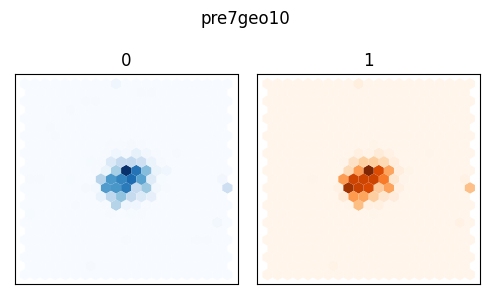

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
fig.suptitle('pre7geo10')
axes = axes.flatten()
cmaps = ["Blues", "Oranges"]
labels = [0,1]

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"pre7geo10 == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

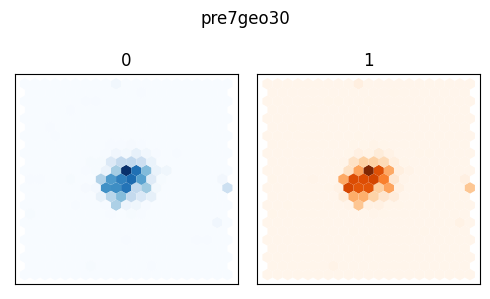

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
fig.suptitle('pre7geo30')
axes = axes.flatten()
cmaps = ["Blues", "Oranges"]
labels = [0,1]

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"pre7geo30 == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

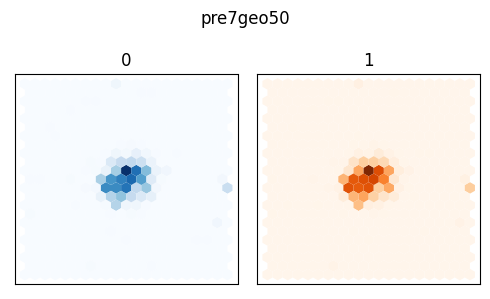

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
fig.suptitle('pre7geo50')
axes = axes.flatten()
cmaps = ["Blues", "Oranges"]
labels = [0,1]

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"pre7geo50 == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

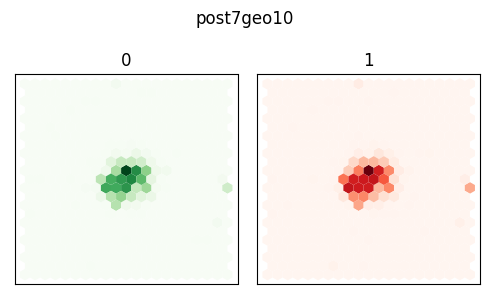

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
fig.suptitle('post7geo10')
axes = axes.flatten()
cmaps = ["Greens", "Reds"]
labels = [0,1]

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"post7geo10 == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

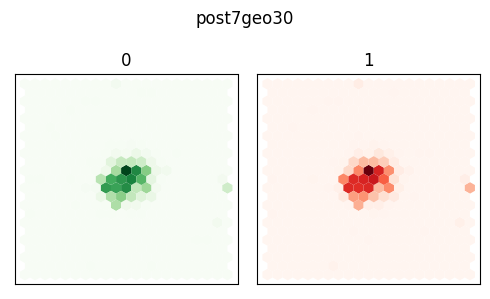

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
fig.suptitle('post7geo30')
axes = axes.flatten()
cmaps = ["Greens", "Reds"]
labels = [0,1]

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"post7geo30 == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

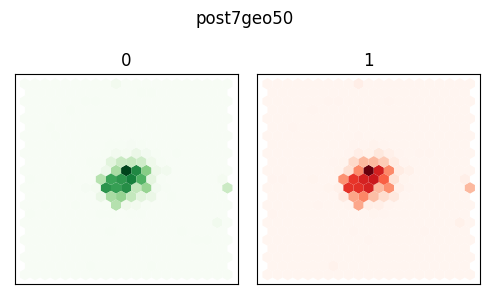

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(5,3))
fig.suptitle('post7geo50')
axes = axes.flatten()
cmaps = ["Greens", "Reds"]
labels = [0,1]

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"post7geo50 == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()